In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error as mse
import umap

from src.utils_data import load_data
from src.utils_experiment import read_config, write_config
from src.utils_visualization import plot_images,reduce_and_plot,plot_pca_var_ratio

import warnings
warnings.filterwarnings('ignore')

In [2]:
config = read_config('mnist')

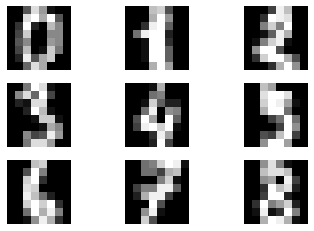

In [5]:
xtrain, ytrain, xtest, ytest = load_data(config['dataset']['name'])
w, h
plot_images(xtrain[:9].reshape(9, w, h))

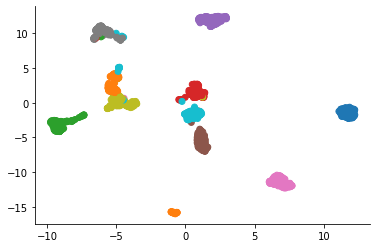

In [7]:
reduce_and_plot(xtrain, ytrain, method='umap', dims=2)

64


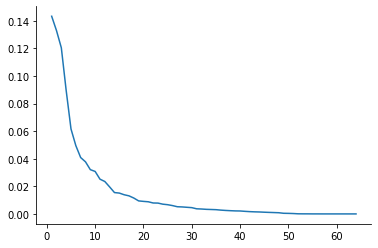

In [9]:
plot_pca_var_ratio(xtrain, n_components=None)

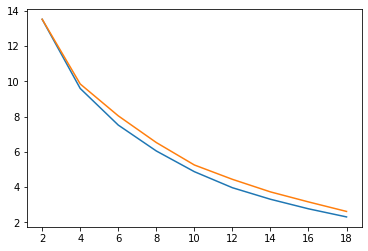

In [10]:
nlist = range(2, 20, 2)
mse_train = []
mse_test = []
for n in nlist:
    pca = PCA(n_components=n)
    pca.fit(xtrain)
    mse_train.append(mse(xtrain, pca.inverse_transform(pca.transform(xtrain))))
    mse_test.append(mse(xtest, pca.inverse_transform(pca.transform(xtest))))
plt.plot(nlist, mse_train)
plt.plot(nlist, mse_test)
plt.show()